In [1]:
import gym
import tensorflow as tf
import numpy as np


In [2]:
from stable_baselines import DQN
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.policies import LnMlpPolicy
from stable_baselines.common.evaluation import evaluate_policy
#from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



C:\Users\Aryaman\AppData\Roaming\Python\Python36\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [4]:
env_name = 'LunarLander-v2'

In [5]:
env = gym.make(env_name)


In [6]:
env = DummyVecEnv([lambda: env])


In [7]:

model = DQN(LnMlpPolicy, env, verbose=1)









Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where









In [ ]:
tf.compat.v1.get_default_session()

In [ ]:
model.learn(total_timesteps=6000)

In [ ]:
model = DQN.load("DQN(LnM)-50000_model", env = env)

In [ ]:
evaluate_policy(model, env,n_eval_episodes=10,render=True)
env.close()

In [ ]:
model.save("DQN(LnM)-1000_model")

In [123]:
model = DQN.load("DQN(LnM)-4000000_model", env = env)
obs = env.reset()

episodes = 100
total_score =0
lst1 = []
lst2 = []
for episode in range(1,episodes-1):
    state = env.reset()
    done = False
    score = 0
    
    while not done:
        #env.render()
        action, _states = model.predict(obs) 
        obs, reward, done, info = env.step(action)
        score+= reward
        total_score+=reward

    print('Episode:{} Score{}'.format(episode,score))
    lst1.append(score)
    lst2.append(episode)
print("avg score", str(total_score/episode))
#print(lst2,lst1)
env.close()

Episode:1 Score[268.11023]
Episode:2 Score[301.7575]
Episode:3 Score[259.70157]
Episode:4 Score[255.16362]
Episode:5 Score[301.72394]
Episode:6 Score[269.70538]
Episode:7 Score[304.13513]
Episode:8 Score[275.4076]
Episode:9 Score[282.66852]
Episode:10 Score[285.3806]
Episode:11 Score[167.5686]
Episode:12 Score[296.36877]
Episode:13 Score[280.74545]
Episode:14 Score[273.50232]
Episode:15 Score[296.45044]
Episode:16 Score[271.24597]
Episode:17 Score[269.57794]
Episode:18 Score[219.01309]
Episode:19 Score[291.20703]
Episode:20 Score[281.5633]
Episode:21 Score[298.2994]
Episode:22 Score[285.54425]
Episode:23 Score[282.16916]
Episode:24 Score[282.82834]
Episode:25 Score[245.3093]
Episode:26 Score[261.9922]
Episode:27 Score[292.2329]
Episode:28 Score[270.9876]
Episode:29 Score[277.71997]
Episode:30 Score[279.32886]
Episode:31 Score[237.95547]
Episode:32 Score[276.73175]
Episode:33 Score[245.95435]
Episode:34 Score[46.214767]
Episode:35 Score[278.65756]
Episode:36 Score[295.96683]
Episode:37 

In [124]:

lst1 = [i.item() for i in lst1]


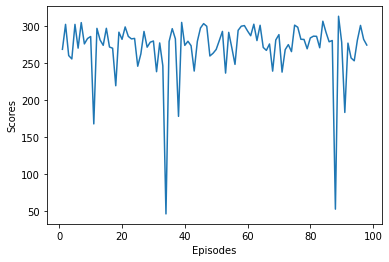

In [126]:
import matplotlib.pyplot as plt 


plt.plot(lst2,lst1)
plt.xlabel("Episodes")
plt.ylabel("Scores")
plt.savefig("4000000-output.jpg")

plt.show()


In [72]:
env.close()